<a href="https://colab.research.google.com/github/Minhvt34/Machine-Learning-notes/blob/main/Important_Machine_Learning_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Machine Learning notes***



> 1. How to put more weight on certain features in machine learning?

First of all - one should probably not do it. The whole concept of machine learning is to use statistical analysis to assign optimal weights. You are interfering here with the whole concept, thus you need really strong evidence that this is crucial to the process you are trying to model, and for some reason your model is currently missing it.

That being said - there is general answer. This is purely model specific, some of which will allow you to weight features - in random forest you could bias distribution from which you sample features to analyse towards the ones that you are interested in; in SVM it should be enough to just multiply given feature by a constant - rememeber when you were told to normalize your features in SVM? This is why - you can use the scale of features to 'steer' your classifier towards given features. The ones with high values will be preffered. This will actually work for any weight norm-regularized model (regularized logistic regression, ridge regression, lasso etc.)



> 2.  Can I use ogistic regression for a time series forecasting problem?

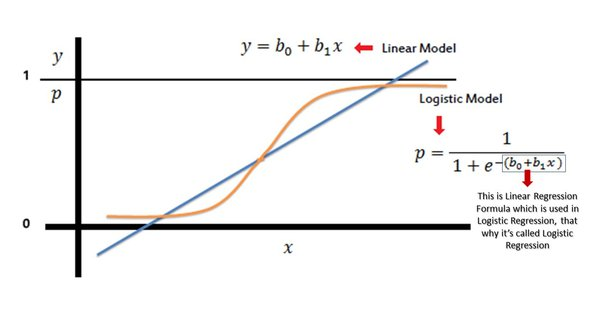



Answer: Not at all, because time series is autocorrelated by its own past value i.e the value recorded in the one time affected by its past value. There are several methods used in time series like Exponential Smoothing, ARIMA(Seasonal or Non Season), etc.
\\
Logistic Regression is a classification technique. It is used on the binary data outcome. i.e the outcome in the form of Yes/No, T/F, S/F, 1/0



> A note about set() and dict in Python - HashMap vs HashTable





* https://www.softlogicsys.in/hash-tables-and-hashmaps-in-python/

* Hashtables and Hashmaps are two different names for the exact same data structure. Python doesn't really use either name, and prefers to use "dictionary" instead.

* Hashsets are basically hashtables with no values, just the key Python sets are implemented like that.



# > About distribution distance



1. Are Mutual Information and Kullback-Leibler divergence equivalent?
- Mutual Information is not a metric. A metric $d$ satisfies the identity of indisceribles: $d(x, y) = 0$ if and only if $x = y$. This is not true of mutual information, which behaves in the opposite manner -- zero mutal information implies that two random variables are independent (as far from identical as you can get). And, if two random variables are identical, they have maximal mutual information (as far from zero as you can get).

- KL divergence is not a metric. It's not symmetric and doesn't satisfy the triangle inequality (in Euclidean geometry, theorem that the sum of any two sides of a triangle is greater than or equal to the third side; in symbols, a + b >= c. In essence, the theorem states that the shortest distance between two points is a straight line.).

* Mutual information and KL divergence are not equivalent. However, the mutual information $I(X,Y)$ between random variables $X$ and $Y$ is given by the KL divergence between the joint distribution $p_{XY}$ and the product of the marginal distributions $p_X ⊗ p_Y$ (what the joint distribution would be if $X$ and $Y$ were independent). \\
$I(X, Y) = D_{KL} (p_{XY} || p_X ⊗ p_Y)$.
Although mutual information is not itself a metric, there are metrics based on it. For example, the variation of information: \\
$VI(X, Y) = H(X, Y) - I(X, Y) = H(X) + H(Y) - 2I(X, Y)$ \\ 
where $H(X)$ and $H(Y)$ are the marginal entropies and $H(X, Y)$ is the joint entropy.

* There are two analytical distributions $p(x)$ and $q(x)$, and you want to calculate distance between them, $D(p, q)$.
There are a plenty of measures of distance between two distributions: \\
* Kullback-Liebler
* Mutual information
* Total variation
* Hellinger distance
* Alpha family of divergences and so on \\
As $p(x)$ and $q(x)$ are complex it is almost impossible that there exists analytical expression for some $D(p, q)$, so you will need a numerical way to calculate those distances. Note, that calculation almost all distances involves numerical integration - so they will be rather imprecise if $x$ dimension is high. \\
* The Kullback-Leibler divergence measures the distance between two distributions: $P(X, Y)$ and $P(X).P(Y)$. On the other hand, Mutual information measures the amount of information that one random variables $X$ contains about another random variable $Y$. However, It is possible to relate both metrics as: \\
$I(X, Y) = H(X) + H(Y) - H(X, Y) = D_{KL}(P(X, Y) || P(X).P(Y))$ \\
Besides, both metrics are only zero when the r.v. are independent. \\
$$P(X, Y) = P(X).P(Y) → \begin{cases} I(X, Y) = H(X) + H(Y) - (H(X) + H(Y)) = 0 \\
D_{KL}(P(X,Y) || P(X).P(Y)) = 0.
\end{cases}$$

\\
* If you want a symmetric metric and both metrics encode similar information, IMHO the choise of MI seems straightforward.

# > About Keras TimeDistributed(Dense) vs Dense layer

* `TimeDistributed(Dense)` applies a same dense to every time step during GRU/LSTM Cell unrolling.
So the error function will be between predicted label sequence and the actual label sequence.
(Which is normally the requirement for sequence to sequence labeling problems).

However, `with return_sequences = FALSE`, `Dense` layer is applied only once at the last cell. This is normally the case when RNNs are used for classification problems. If `return_sequences = TRUE` then `Dense` layer is applied to every time step just like `TimeDistributed(Dense)`.

So for as per your models both are same, but if you change your second model to `return_sequences=False`, then `Dense` will be applied only at the last cell. Try changing it and the model will throw as error because then the `Y` will be of size `[Batch_size, InputSize]`, it is no more a sequence to sequence but a full sequence to label problem.

```bash
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed
from keras.layers.recurrent import GRU
import numpy as np

InputSize = 15
MaxLen = 64
HiddenSize = 16

OutputSize = 8
n_samples = 1000

model1 = Sequential()
model1.add(GRU(HiddenSize, return_sequences=True, input_shape=(MaxLen, InputSize)))
model1.add(TimeDistributed(Dense(OutputSize)))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop')


model2 = Sequential()
model2.add(GRU(HiddenSize, return_sequences=True, input_shape=(MaxLen, InputSize)))
model2.add(Dense(OutputSize))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop')

model3 = Sequential()
model3.add(GRU(HiddenSize, return_sequences=False, input_shape=(MaxLen, InputSize)))
model3.add(Dense(OutputSize))
model3.add(Activation('softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop')

X = np.random.random([n_samples,MaxLen,InputSize])
Y1 = np.random.random([n_samples,MaxLen,OutputSize])
Y2 = np.random.random([n_samples, OutputSize])

model1.fit(X, Y1, batch_size=128, nb_epoch=1)
model2.fit(X, Y1, batch_size=128, nb_epoch=1)
model3.fit(X, Y2, batch_size=128, nb_epoch=1)

print(model1.summary())
print(model2.summary())
print(model3.summary())
```

In the above example architecture of `model1` and `model2` are sample (sequence to sequence models) and `model3` is a full sequence to label model.